In [21]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from dateutil.parser import parse

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


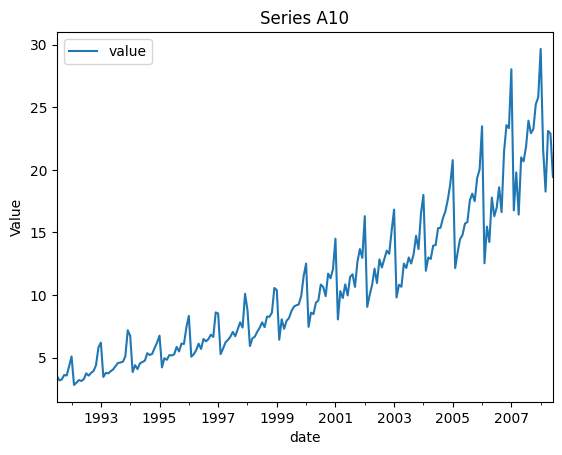

In [22]:
# Visualizar o gráfico dos dados para decidir sobre o modelo
df.plot(title='Series A10', ylabel='Value')
plt.show()

In [ ]:
#aditiva e multiplicativa com base no gráfico
result_multiplicative = seasonal_decompose(df['value'], model='multiplicative', period=12)
result_additive = seasonal_decompose(df['value'], model='additive', period=12)

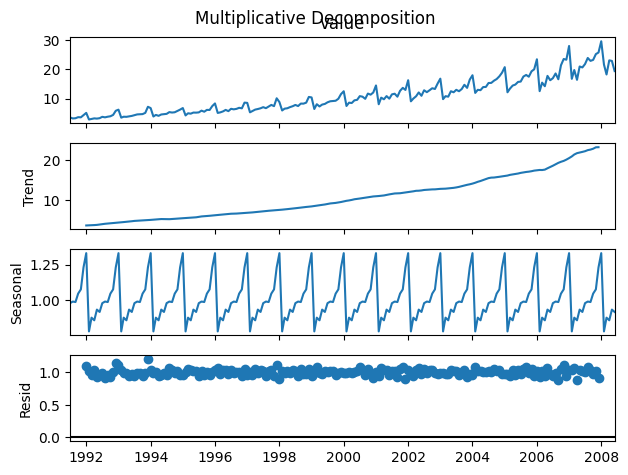

In [24]:
# Plotar a decomposição
result_multiplicative.plot()
plt.suptitle('Multiplicative Decomposition')
plt.show()

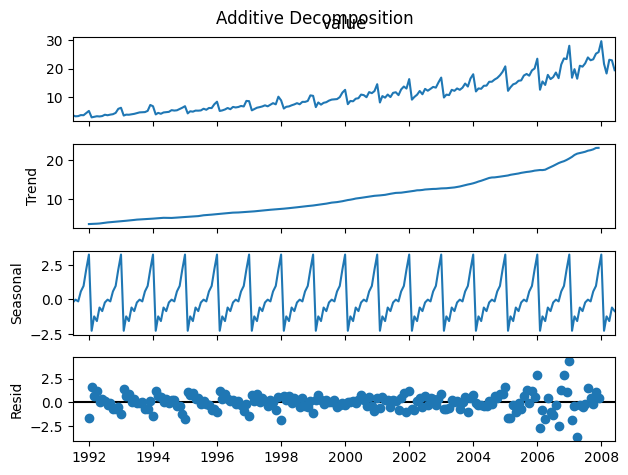

In [25]:
result_additive.plot()
plt.suptitle('Additive Decomposition')
plt.show()

Previsão para 2008-07: 23.55
Previsão para 2009-06: 24.80


c:\Users\mrsilva\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


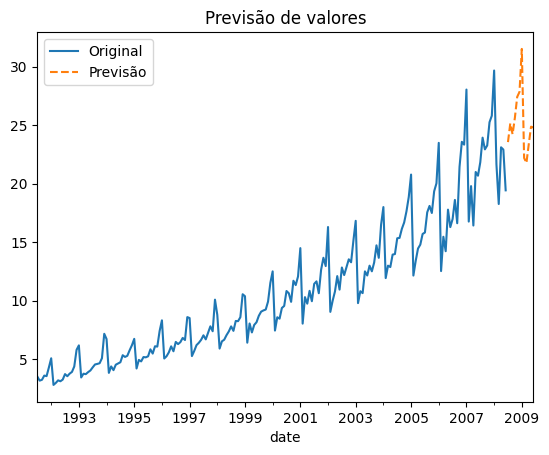

In [ ]:
#Qual seria a previsão de valor para 2008-07? e 2009-06?
model = ExponentialSmoothing(df['value'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.predict(start='2008-07-01', end='2009-06-01')
print(f"Previsão para 2008-07: {forecast['2008-07-01']:.2f}")
print(f"Previsão para 2009-06: {forecast['2009-06-01']:.2f}")

# Plotar a previsão junto com a série original
df['value'].plot(label='Original')
forecast.plot(label='Previsão', linestyle='--')
plt.legend()
plt.title('Previsão de valores')
plt.show()


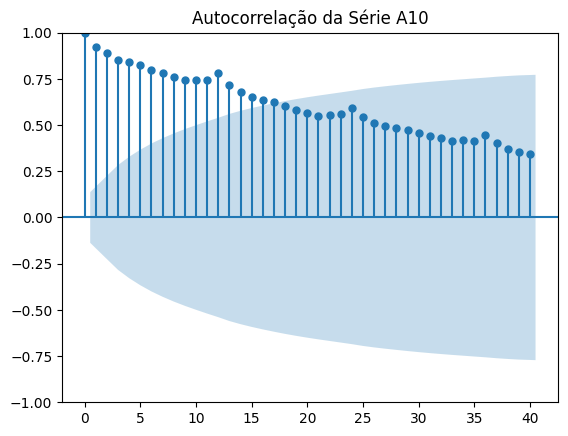

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# autocorrelação
plot_acf(df['value'], lags=40)  
plt.title('Autocorrelação da Série A10')
plt.show()


Os dados têm uma boa relação com os valores anteriores até cerca do lag 16, ou seja, os últimos 16 meses influenciam bastante os valores atuais. Até o lag 16 há uma relação forte e útil, mas depois disso a influência praticamente desaparece.